In [93]:
%cd D:\Pum_Program\HDS_WORK\Year 3\Semester 1\Data sci\Project Data sci

D:\Pum_Program\HDS_WORK\Year 3\Semester 1\Data sci\Project Data sci


In [94]:
import pandas as pd

In [95]:
data = pd.read_csv("fakenews_dataset.csv")

In [96]:
data = data.drop(columns=["Unnamed: 0"])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26000 non-null  int64 
 1   title   25320 non-null  object
 2   author  23540 non-null  object
 3   text    25954 non-null  object
 4   label   26000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1015.8+ KB


In [98]:
data.shape

(26000, 5)

### Exploratory Data Analysis

In [99]:
data["length"] = data["text"].str.len()

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   25320 non-null  object 
 2   author  23540 non-null  object 
 3   text    25954 non-null  object 
 4   label   26000 non-null  int64  
 5   length  25954 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ MB


In [101]:
data.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  length  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  4930.0  
1  Ever get the feeling your life circles the rou...      0  4160.0  
2  Why the Truth Might Get You Fired October 29, ...      1  7692.0  
3  Videos 15 Civilians Killed In Single US Airstr...      1  3237.0  
4  Print \nAn Iranian woman has been sentenced to...      1   938.0

In [102]:
data.describe().T

count          mean          std  min      25%      50%       75%  \
id      26000.0  12999.500000  7505.697836  0.0  6499.75  12999.5  19499.25   
label   26000.0      0.510538     0.499899  0.0     0.00      1.0      1.00   
length  25954.0   4572.113932  5104.336732  1.0  1642.25   3386.5   6319.75   

             max  
id       25999.0  
label        1.0  
length  142961.0

### Distribution of length

<AxesSubplot:>

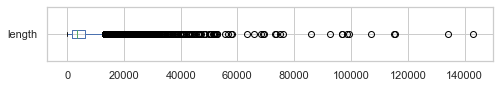

In [103]:
data['length'].plot(kind='box', vert=False, figsize=(8, 1))

In [104]:
data['length'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

<AxesSubplot:ylabel='Frequency'>

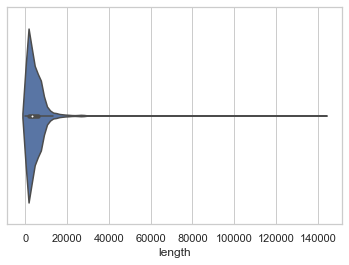

In [105]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["length"])

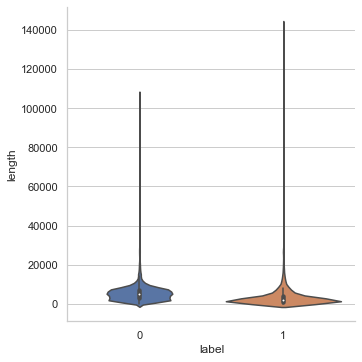

In [106]:
import seaborn as sns

#label = data[['label',"length"]] #.isin for check condition
sns.catplot(data=data[['label',"length"]], x='label', y="length", kind='violin')

## Clean and Pre-processing Data

### checking Missing Data

In [107]:
data.isna().sum()

id           0
title      680
author    2460
text        46
label        0
length      46
dtype: int64

In [108]:
len(data["title"].unique())

24693

### missing title

In [109]:
null_title = data[data["title"].isna() == True]
null_title.shape

(680, 6)

In [110]:
null_title_fakenews = null_title[null_title["label"].isin([1])]
null_title_fakenews.head()

id title             author  \
53    53   NaN        Dairy✓ᵀᴿᵁᴹᴾ   
120  120   NaN          Anonymous   
124  124   NaN  SeekSearchDestory   
140  140   NaN          Anonymous   
196  196   NaN             Raffie   

                                                  text  label  length  
53   Sounds like he has our president pegged. What ...      1   679.0  
120  Same people all the time , i dont know how you...      1   135.0  
124  You know, outside of any morality arguments, i...      1   533.0  
140  There is a lot more than meets the eye to this...      1   736.0  
196             They got the heater turned up on high.      1    38.0

In [111]:
null_title_realnews = null_title[null_title["label"].isin([0])]
null_title_realnews

id title                            author  \
20822  20822   NaN                      Dale Johnson   
21387  21387   NaN                         Enjoykin4   
22559  22559   NaN                         Enjoykin4   
23225  23225   NaN                         Enjoykin4   
24261  24261   NaN  tokyowashi (noreply@blogger.com)   

                                                    text  label   length  
20822  VERSE 9. THE STATE OF NATIONAL INSECURITY\nThe...      0  10680.0  
21387  A leading US senator: US Supporting War in Syr...      0   5289.0  
22559  A leading US senator: US Supporting War in Syr...      0   5289.0  
23225  A leading US senator: US Supporting War in Syr...      0   5289.0  
24261  United States Marine Field McConnell  Plum Cit...      0  24205.0

### null title --> real news : 5 , fake news : 675 

### Found duplicated row 

In [112]:
data.drop_duplicates(subset=["title","text"],inplace=True)

### drop duplicated value from title and text columns

In [113]:
data.shape

(25846, 6)

### missing author

In [114]:
null_author = data[data["author"].isna() == True]
null_author.shape

(2419, 6)

In [115]:
null_author_fakenews = null_author[null_author["label"].isin([1])]
null_author_fakenews.head()

id                                              title author  \
6    6  Life: Life Of Luxury: Elton John’s 6 Favorite ...    NaN   
20  20  News: Hope For The GOP: A Nude Paul Ryan Has J...    NaN   
23  23  Massachusetts Cop’s Wife Busted for Pinning Fa...    NaN   
31  31  Israel is Becoming Pivotal to China’s Mid-East...    NaN   
43  43  Can I have one girlfriend without you bastards...    NaN   

                                                 text  label  length  
6   Ever wonder how Britain’s most iconic pop pian...      1  2729.0  
20  Email \nSince Donald Trump entered the electio...      1  2231.0  
23  Massachusetts Cop’s Wife Busted for Pinning Fa...      1  2801.0  
31  Country: Israel While China is silently playin...      1  7050.0  
43  Can I have one girlfriend without you bastards...      1  1051.0

In [116]:
null_author_realnews = null_author[null_author["label"].isin([0])]
null_author_realnews.head()

id                                              title author  \
8        8  Excerpts From a Draft Script for Donald Trump’...    NaN   
685    685  The New York Times to Offer Open Access on Web...    NaN   
2785  2785    How the Poll Was Conducted - The New York Times    NaN   
3203  3203  37 Who Saw Murder Didn’t Call the Police - The...    NaN   
3470  3470  ‘My First Gay Bar’: Rachel Maddow, Andy Cohen ...    NaN   

                                                   text  label   length  
8     Donald J. Trump is scheduled to make a highly ...      0   8177.0  
685   The New York Times is inviting readers to take...      0   2135.0  
2785  The latest New York   News Poll is based on te...      0   2713.0  
3203  For more than half an hour 38 respectable, law...      0   7956.0  
3470  For generations of gays and lesbians, especial...      0  19345.0

### null author --> real news : 147 , fake news : 2313

### missing text

In [117]:
null_text = data[data["text"].isna() == True]
null_text.shape

(46, 6)

In [118]:
null_text_fakenews = null_text[null_text["label"].isin([1])]
null_text_fakenews.head()

id                                              title author text  \
142    142  Gorafi Magazine : Entretien exclusif avec Bara...    NaN  NaN   
573    573  Le top des recherches Google passe en top des ...    NaN  NaN   
1200  1200  La Corée du Nord annonce avoir envoyé un missi...    NaN  NaN   
1911  1911  Grand-Prix du Brésil – Romain Grosjean obtient...    NaN  NaN   
2148  2148  Gorafi Magazine: Barack Obama « Je vous ai déj...    NaN  NaN   

      label  length  
142       1     NaN  
573       1     NaN  
1200      1     NaN  
1911      1     NaN  
2148      1     NaN

In [119]:
null_text_fakenews.shape

(46, 6)

### insight : all missing text value is fake news

In [120]:
data_export = data.copy()

In [121]:
data_export["title"].fillna("No-Title",inplace=True)
data_export["author"].fillna("Anonymous",inplace=True)
data_export["text"].fillna(" ",inplace=True)
data_export["length"].fillna(0,inplace=True)

In [122]:
data_export.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

In [123]:
#data_export.to_csv("fakenewsDatasetClean.csv", encoding='utf-8', index=False)

In [124]:
#data.isna().sum()

### Fill all missing data 

### data_1 fill na with " " 

In [125]:
data_1 = data.copy()

In [126]:
data_1["title"].fillna(" ",inplace=True)
data_1["author"].fillna(" ",inplace=True)
data_1["text"].fillna(" ",inplace=True)
data_1["length"].fillna(0,inplace=True)

In [127]:
data_1.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

In [128]:
data_1.tail(10)

id                                              title  \
25990  25990  Secret Service Shoots Man Near White House - T...   
25991  25991  E3 Hands-On with ’South Park: The Fractured bu...   
25992  25992  Earth To Ammosexuals: NRA Admits No One Is Com...   
25993  25993  Toyota Recalls 1.4 Million Vehicles as 2nd Maj...   
25994  25994  Trump on If ’Tapes’ Exist of Comey Conversatio...   
25995  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
25996  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
25997  25997  California Today: What, Exactly, Is in Your Su...   
25998  25998  300 US Marines To Be Deployed To Russian Borde...   
25999  25999  Awkward Sex, Onscreen and Off - The New York T...   

                                              author  \
25990  Julie Hirschfeld Davis and Michael S. Schmidt   
25991                                    Lucas Nolan   
25992                                 Natalie Dailey   
25993              Hiroko Tabuchi and Jonathan Soble   
25994                                        Pam Key   
25995                                     Jody Rosen   
25996                            Sheryl Gay Stolberg   
25997                                   Mike McPhate   
25998                                                  
25999                                    Teddy Wayne   

                                                    text  label   length  
25990  WASHINGTON  —   A man who approached the White...      1   2367.0  
25991  The title of South Park: The Fractured but Who...      1   3271.0  
25992  Earth To Ammosexuals: NRA Admits No One Is Com...      1   2420.0  
25993  Public concern about faulty automobile airbags...      0   5096.0  
25994  Pres. Trump on if “tapes” exist of his convers...      1   1315.0  
25995  Of all the dysfunctions that plague the world’...      0  18376.0  
25996  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...      1   3415.0  
25997  Good morning. (Want to get California Today by...      0   5682.0  
25998  « Previous - Next » 300 US Marines To Be Deplo...      1   2634.0  
25999  Perhaps you’ve seen the new TV series whose pi...      0   8500.0

## Word Cloud

In [129]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [130]:
type(data["title"][0])

str

In [131]:
data["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [132]:
datawc = data.copy()

In [133]:
datawc = datawc.drop(["length"],axis=1)

In [134]:
datawc.isna().sum()

id           0
title      630
author    2419
text        46
label        0
dtype: int64

In [135]:
datawc.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [136]:
fakewc = datawc[datawc["label"].isin([1])]

In [137]:
fakewc.isna().sum()

id           0
title      628
author    2274
text        46
label        0
dtype: int64

In [138]:
fakewc.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...                 NaN   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
6  Ever wonder how Britain’s most iconic pop pian...      1

In [139]:
fakewc["title"].fillna("None-Title",inplace=True)

C:\Users\66885\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [140]:
fakewc["author"].fillna("Anonymous",inplace=True)

In [141]:
fakewc["text"].fillna(0,inplace=True)

In [142]:
fakewc.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [143]:
def tokenize(text):
    word = re.findall(r'[\w]+', str(text))
    return word

In [144]:
def remove_stop(tokens):
    return [str(t) for t in tokens if t.lower() not in stop_words]

In [145]:
def lowertext(tokens):
    return [str(t.lower() ) for t in tokens]

### Remove stop words and normalization

In [146]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import re
import numpy as np

In [147]:
fakewc["tokens_title"] = fakewc["title"].apply(tokenize)

<ipython-input-147-40d1ab295758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakewc["tokens_title"] = fakewc["title"].apply(tokenize)


In [148]:
fakewc["tokens_title"] = fakewc["tokens_title"].apply(remove_stop)

<ipython-input-148-0a88222c7138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakewc["tokens_title"] = fakewc["tokens_title"].apply(remove_stop)


In [149]:
fakewc["tokens_title"] = fakewc["tokens_title"].apply(lowertext)

<ipython-input-149-669f66f4671d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakewc["tokens_title"] = fakewc["tokens_title"].apply(lowertext)


In [150]:
fakewc["tokens_title"]

0        [house, dem, aide, even, see, comey, letter, j...
2                               [truth, might, get, fired]
3        [15, civilians, killed, single, us, airstrike,...
4        [iranian, woman, jailed, fictional, unpublishe...
6        [life, life, luxury, elton, john, 6, favorite,...
                               ...                        
25991    [e3, hands, south, park, fractured, whole, sou...
25992    [earth, ammosexuals, nra, admits, one, coming,...
25994    [trump, tapes, exist, comey, conversation, tel...
25996    [john, kasich, signs, one, abortion, bill, ohi...
25998    [300, us, marines, deployed, russian, border, ...
Name: tokens_title, Length: 13139, dtype: object

In [151]:
fakewc.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...           Anonymous   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   
6  Ever wonder how Britain’s most iconic pop pian...      1   

                                        tokens_title  
0  [house, dem, aide, even, see, comey, letter, j...  
2                         [truth, might, get, fired]  
3  [15, civilians, killed, single, us, airstrike,...  
4  [iranian, woman, jailed, fictional, unpublishe...  
6  [life, life, luxury, elton, john, 6, favorite,...

## N-gram

In [152]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [153]:
fakewc["bigram_title"] = fakewc["tokens_title"].apply(ngrams,stopwords=stop_words)

<ipython-input-153-4450a91ccb9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakewc["bigram_title"] = fakewc["tokens_title"].apply(ngrams,stopwords=stop_words)


In [154]:
bgram = fakewc["bigram_title"]
bgram

0        [house dem, dem aide, aide even, even see, see...
2                      [truth might, might get, get fired]
3        [15 civilians, civilians killed, killed single...
4        [iranian woman, woman jailed, jailed fictional...
6        [life life, life luxury, luxury elton, elton j...
                               ...                        
25991    [e3 hands, hands south, south park, park fract...
25992    [earth ammosexuals, ammosexuals nra, nra admit...
25994    [trump tapes, tapes exist, exist comey, comey ...
25996    [john kasich, kasich signs, signs one, one abo...
25998    [300 us, us marines, marines deployed, deploye...
Name: bigram_title, Length: 13139, dtype: object

In [155]:
wctokens = fakewc["tokens_title"].explode().values
wctokens

array(['house', 'dem', 'aide', ..., 'russian', 'border', 'norway'],
      dtype=object)

In [156]:
wcbigrams = fakewc["bigram_title"].explode().values
wcbigrams

array(['house dem', 'dem aide', 'aide even', ..., 'deployed russian',
       'russian border', 'border norway'], dtype=object)

In [157]:
count_tokens_title = Counter(wctokens)

In [158]:
count_tokens_title.most_common(10)

[('trump', 1956),
 ('hillary', 1208),
 ('clinton', 1066),
 ('new', 766),
 ('none', 630),
 ('title', 629),
 ('election', 558),
 ('breitbart', 506),
 ('us', 503),
 ('video', 479)]

In [159]:
count_tokens_title[np.nan]

4

In [160]:
del count_tokens_title[np.nan]

In [161]:
wctokens

array(['house', 'dem', 'aide', ..., 'russian', 'border', 'norway'],
      dtype=object)

In [162]:
count_tokens_title.most_common(10)

[('trump', 1956),
 ('hillary', 1208),
 ('clinton', 1066),
 ('new', 766),
 ('none', 630),
 ('title', 629),
 ('election', 558),
 ('breitbart', 506),
 ('us', 503),
 ('video', 479)]

In [163]:
countbg_title = Counter(wcbigrams)

In [164]:
countbg_title.most_common(10)

[('none title', 628),
 ('hillary clinton', 388),
 ('donald trump', 319),
 ('new york', 276),
 ('york times', 252),
 ('world war', 107),
 ('onion america', 96),
 ('america finest', 96),
 ('finest news', 96),
 ('news source', 96)]

In [165]:
del countbg_title[np.nan]

In [166]:
countbg_title.most_common(10)

[('none title', 628),
 ('hillary clinton', 388),
 ('donald trump', 319),
 ('new york', 276),
 ('york times', 252),
 ('world war', 107),
 ('onion america', 96),
 ('america finest', 96),
 ('finest news', 96),
 ('news source', 96)]

In [167]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

## Word Cloud with NaN title

(-0.5, 799.5, 399.5, -0.5)

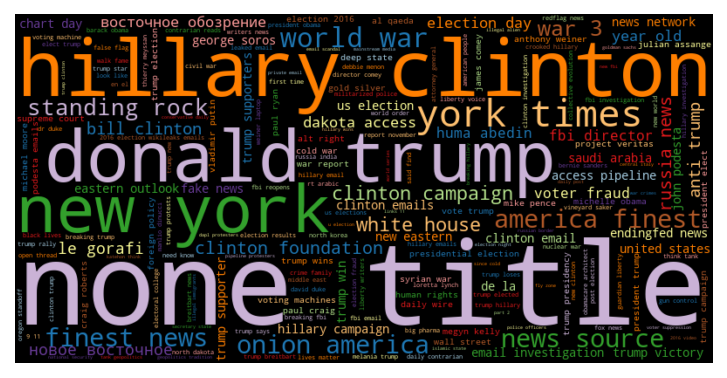

In [168]:
wc.generate_from_frequencies(countbg_title)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Data_2 fill author with Anonymous, title fill with None-title and text fill with " "

In [169]:
data_2 = data.copy()

In [170]:
data_2.isna().sum()

id           0
title      630
author    2419
text        46
label        0
length      46
dtype: int64

In [171]:
data_2["title"].fillna("None-title",inplace=True)
data_2["author"].fillna("Anonymous",inplace=True)
data_2["text"].fillna(" ",inplace=True)
data_2["length"].fillna(0,inplace=True)

In [172]:
data_2[data_2["author"].isin(["Anonymous"])]

id                                              title     author  \
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...  Anonymous   
8          8  Excerpts From a Draft Script for Donald Trump’...  Anonymous   
20        20  News: Hope For The GOP: A Nude Paul Ryan Has J...  Anonymous   
23        23  Massachusetts Cop’s Wife Busted for Pinning Fa...  Anonymous   
31        31  Israel is Becoming Pivotal to China’s Mid-East...  Anonymous   
...      ...                                                ...        ...   
25952  25952  Flotilla of Russian warships sails into the Me...  Anonymous   
25963  25963  TRUMP RECEIVED BY MASSIVE CROWD IN ALBUQUERQUE...  Anonymous   
25970  25970  Reinventing Democracy in America Starts by Vot...  Anonymous   
25972  25972  The Postmodern Stalinism of the Western Media ...  Anonymous   
25998  25998  300 US Marines To Be Deployed To Russian Borde...  Anonymous   

                                                    text  label  length  
6      Ever wonder how Britain’s most iconic pop pian...      1  2729.0  
8      Donald J. Trump is scheduled to make a highly ...      0  8177.0  
20     Email \nSince Donald Trump entered the electio...      1  2231.0  
23     Massachusetts Cop’s Wife Busted for Pinning Fa...      1  2801.0  
31     Country: Israel While China is silently playin...      1  7050.0  
...                                                  ...    ...     ...  
25952  09:01 EST, 12 November 2016 | Updated: 18:54 E...      1  4042.0  
25963  Home / News / TRUMP RECEIVED BY MASSIVE CROWD ...      1  1251.0  
25970  Reinventing Democracy in America Starts by Vot...      0  7709.0  
25972  Originally appeared at Chronicles Magazine \nI...      0  4154.0  
25998  « Previous - Next » 300 US Marines To Be Deplo...      1  2634.0  

[2466 rows x 6 columns]

In [173]:
data_2[data_2["title"].isin(["None-title"])]

id       title                        author  \
53        53  None-title                   Dairy✓ᵀᴿᵁᴹᴾ   
120      120  None-title                     Anonymous   
124      124  None-title             SeekSearchDestory   
140      140  None-title                     Anonymous   
196      196  None-title                        Raffie   
...      ...         ...                           ...   
25645  25645  None-title  fundamentaly flawed humanity   
25724  25724  None-title                     Snowonweb   
25755  25755  None-title                    John Doyle   
25763  25763  None-title                Barry Branscum   
25866  25866  None-title                     Anonymous   

                                                    text  label  length  
53     Sounds like he has our president pegged. What ...      1   679.0  
120    Same people all the time , i dont know how you...      1   135.0  
124    You know, outside of any morality arguments, i...      1   533.0  
140    There is a lot more than meets the eye to this...      1   736.0  
196               They got the heater turned up on high.      1    38.0  
...                                                  ...    ...     ...  
25645  anyone heard of the protective insert for wome...      1   225.0  
25724                                      great article      1    13.0  
25755  Obama himself denied any knowledge of the serv...      1   176.0  
25763                   Right. Well that clears that up.      1    32.0  
25866  Its true you know the CATHOLICS ARE BEHIND EVE...      1   903.0  

[630 rows x 6 columns]

In [174]:
data_2.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

####################

### Prepare Data [Data1 : author, title, text fillna with " "]

In [175]:
data_1['text_corpus'] = data_1['author'] +' '+ data_1['title'] + ' ' + data_1['text']

In [176]:
X = data.drop(columns="label", axis=1) 
Y = data["label"]

### Prepare Data [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [177]:
data_2["text_corpus"] = data_2["author"] + " " + data_2["title"] + " " + data_2["text"]

In [178]:
X_2 = data_2.drop(columns="label",axis=1)
Y_2 = data_2["label"]

### Prepare Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [179]:
data_3 = data_2.copy()

In [180]:
data_3.drop(columns=["text_corpus"],inplace=True)

In [194]:
data_3["text_corpus"] = data_3["author"] + " " + data_3["title"]

## Test clean text

In [182]:
testclean = data_1["text_corpus"][0]
testclean

'Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [183]:
#cleaned_text = re.sub("’t",' ',cleaned_text)
#cleaned_text

In [184]:
#cleaned_text = re.sub('[^a-zA-Z\@]',' ',cleaned_text)
#cleaned_text

In [185]:
cleaned_text = re.sub('[^a-zA-Z\@\’]',' ',testclean)
cleaned_text

'Darrell Lucus House Dem Aide  We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide  We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October          Subscribe Jason Chaffetz on the stump in American Fork  Utah   image courtesy Michael Jolley  available under a Creative Commons BY license   With apologies to Keith Olbermann  there is no doubt who the Worst Person in The World is this week FBI Director James Comey  But according to a House Democratic aide  it looks like we also know who the second worst person is as well  It turns out that when Comey sent his now infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server  the ranking Democrats on the relevant committees didn’t hear about it from Comey  They found out via a tweet from one of the Republican committee chairmen   As we now know  Comey notified the Republican chairmen and Democratic ranking members of 

## Lemmatization 
คือ กระบวนการในการแปลง Word ด้วยรายการคำศัพท์ใน Dictionary, การวิเคราะห์หลักไวยกรณ์ของภาษาอย่างเหมาะสม ในการแปรคำ ผันคำ เพื่อกำจัด Inflection ของคำ เช่น เพศ, Tense, เสียง, อารมณ์, จำนวน, etc. ส่วนใหญ่จะตัดส่วนท้าย ให้เหลือแต่รูปฟอร์มพื้นฐาน เป็นคำใน Dictionary เรียกว่า Lemma

ตัวอย่างเช่น saw ถ้าใช้ Stemming จะทำได้ดีที่สุดแค่ s แต่ถ้าใช้ Lemmatization จะได้ see หรือ saw ขึ้นอยู่กับว่าเป็น Noun หรือ Verb

police policy ==> polic stemming
lemmatize ==> polices policies ==> police , policy 

In [186]:
from nltk import stem

In [187]:
wnl = stem.WordNetLemmatizer()

In [188]:
#cleaned_text = re.sub("[’s\’t\’ve]",' ',testclean)
#cleaned_text

In [189]:
def Lemmatization(text):
    #clean and normalize
    lemmatize_txt = re.sub('[^a-zA-Z\@\’]',' ',text) 
    lemmatize_txt = lemmatize_txt.lower() 
    lemmatize_txt = lemmatize_txt.split() 
    lemmatize_txt = [wnl.lemmatize(word) for word in lemmatize_txt
                     if not word in stopwords.words("english")]
    
    lemmatize_txt = " ".join(lemmatize_txt) 
    return lemmatize_txt

In [190]:
Lemmatization(cleaned_text) ## Test

'darrell lucus house dem aide didn’t even see comey’s letter jason chaffetz tweeted house dem aide didn’t even see comey’s letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton’s email server ranking democrat relevant committee didn’t hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear 

### [Data1 : author, title, text fillna with " "]

In [101]:
%time

Wall time: 0 ns


In [97]:
data_1["text_corpus"] = data_1["text_corpus"].apply(Lemmatization)

In [98]:
X = data_1["text_corpus"].values
Y = data_1["label"].values

In [145]:
data_1["text_corpus"][140]

'anonymous lot meet eye mob wait till read quot soon thereafter resigned yang took another job florida department transportation fdot discovered illegal activity yang contract fdot involving billing defrauding state florida regarding contract nee sentenced october u district judge gregory presenell three year supervised probation fine illegal chinese alien admitting paramount corporate treasonable espionage guy get slap wrist http www bradblog com page id finding connection serco via contract'

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [99]:
%time

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [ ]:
data_2["text_corpus"] = data_2["text_corpus"].apply(Lemmatization)

In [102]:
X_2 = data_1["text_corpus"].values
Y_2 = data_1["label"].values

In [196]:
data_2["text_corpus"].iloc[140]

'Anonymous None-title There is a lot more than meets the eye to this mob , wait till you read this . &quot;Soon thereafter I resigned from Yang and took another job at the Florida Department of Transportation (FDOT). While there, I discovered some other illegal activities of Yang, who had contracts with FDOT, involving over-billing and defrauding of the State of Florida regarding contracts Nee was sentenced on October 7, 2004 by U.S. District Judge Gregory A. Presenell to three years of supervised probation and $100 fine. An illegal Chinese alien admitting to what is paramount to corporate if not treasonable espionage, and the guy gets a slap on the wrist. http://www.bradblog.com/?page_id=3526  now finding the connection to Serco via contracts ....'

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [195]:
%time

Wall time: 0 ns


In [196]:
data_3["text_corpus"] = data_3["text_corpus"].apply(Lemmatization)

In [197]:
X_3 = data_3["text_corpus"].values
Y_3 = data_3["label"].values

In [221]:
data_3["text_corpus"][9]

'megan twohey scott shane back channel plan ukraine russia courtesy trump associate new york time'

In [222]:
data_3["text_corpus"][7]

'alissa j rubin beno hamon win french socialist party’s presidential nomination new york time'

In [199]:
%time

Wall time: 0 ns


## TF-IDF 
### (Term Frequency, Inverse Document Frequency)

#### convert textual data to numerical data

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

### [Data1 : author, title, text fillna with " "]

In [104]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [105]:
print(X)

  (0, 153465)	0.04923940045136859
  (0, 153401)	0.03897469337983262
  (0, 153392)	0.00927917927374939
  (0, 152221)	0.043228233600108835
  (0, 152216)	0.0924190329167033
  (0, 152150)	0.036680407301068745
  (0, 152105)	0.012896311174318423
  (0, 151251)	0.017803255153630283
  (0, 150179)	0.016631303924382123
  (0, 150054)	0.012259973144040925
  (0, 149944)	0.028388658610656693
  (0, 149833)	0.012539033818431234
  (0, 149663)	0.015089742132857596
  (0, 149575)	0.011460444217002859
  (0, 148446)	0.027480807050479082
  (0, 148420)	0.02101513635163675
  (0, 148392)	0.016499060096838197
  (0, 147047)	0.020964241250920262
  (0, 146043)	0.015597723653776397
  (0, 145170)	0.06372222983494662
  (0, 144185)	0.033551793901864316
  (0, 143841)	0.017002818958649184
  (0, 142671)	0.039433245412955356
  (0, 141879)	0.010789435677394536
  (0, 141865)	0.042002250735389095
  :	:
  (25845, 6153)	0.04508263137873355
  (25845, 5953)	0.021845169247270604
  (25845, 5716)	0.022128713790030823
  (25845, 5583)	

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [106]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_2)

X_2 = vectorizer.transform(X_2)

In [107]:
print(X_2)

  (0, 153465)	0.04923940045136859
  (0, 153401)	0.03897469337983262
  (0, 153392)	0.00927917927374939
  (0, 152221)	0.043228233600108835
  (0, 152216)	0.0924190329167033
  (0, 152150)	0.036680407301068745
  (0, 152105)	0.012896311174318423
  (0, 151251)	0.017803255153630283
  (0, 150179)	0.016631303924382123
  (0, 150054)	0.012259973144040925
  (0, 149944)	0.028388658610656693
  (0, 149833)	0.012539033818431234
  (0, 149663)	0.015089742132857596
  (0, 149575)	0.011460444217002859
  (0, 148446)	0.027480807050479082
  (0, 148420)	0.02101513635163675
  (0, 148392)	0.016499060096838197
  (0, 147047)	0.020964241250920262
  (0, 146043)	0.015597723653776397
  (0, 145170)	0.06372222983494662
  (0, 144185)	0.033551793901864316
  (0, 143841)	0.017002818958649184
  (0, 142671)	0.039433245412955356
  (0, 141879)	0.010789435677394536
  (0, 141865)	0.042002250735389095
  :	:
  (25845, 6153)	0.04508263137873355
  (25845, 5953)	0.021845169247270604
  (25845, 5716)	0.022128713790030823
  (25845, 5583)	

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [202]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_3)

X_3 = vectorizer.transform(X_3)

In [203]:
print(X_3)

  (0, 21881)	0.36239183439166645
  (0, 18766)	0.23209003125484087
  (0, 12486)	0.33247401302710794
  (0, 12095)	0.2622534505965292
  (0, 10938)	0.2245647554193749
  (0, 9892)	0.19746877187578993
  (0, 7079)	0.24871950723522565
  (0, 5642)	0.26625132954951697
  (0, 5284)	0.27072057798029464
  (0, 4985)	0.3291723876452898
  (0, 4018)	0.21794895886127919
  (0, 3361)	0.33609053444849757
  (0, 416)	0.26685845858177515
  (1, 23368)	0.2718238890041953
  (1, 9641)	0.19437797969674483
  (1, 7910)	0.7253511930157482
  (1, 4946)	0.2685514437090482
  (1, 3810)	0.1949820208978415
  (1, 3019)	0.37064573921019
  (1, 2588)	0.15693285962532652
  (1, 2070)	0.3000842687476412
  (2, 21785)	0.3992589860686909
  (2, 13398)	0.4742813077101476
  (2, 8541)	0.34403560356422574
  (2, 7752)	0.4625217092465122
  :	:
  (25842, 2094)	0.1984569970869304
  (25842, 58)	0.2651584673327293
  (25843, 23609)	0.11971376318881789
  (25843, 21382)	0.34044252314048823
  (25843, 21324)	0.11742083871212379
  (25843, 20653)	0.522

## Modeling

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import itertools

### [Data1 : author, title, text fillna with " "]

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 124)

In [110]:
Model = LogisticRegression()
Model.fit(X_train, Y_train)

LogisticRegression()

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [111]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, stratify = Y_2, random_state = 124)

In [112]:
Model2 = LogisticRegression()
Model2.fit(X_train_2, Y_train_2)

LogisticRegression()

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [206]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.2, stratify = Y_3, random_state = 124)

In [207]:
Model3 = LogisticRegression()
Model3.fit(X_train_3, Y_train_3)

LogisticRegression()

## Evaluate model

### [Data1 : author, title, text fillna with " "]

In [113]:
X_train_prediction = Model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on the training data: ',training_data_accuracy)

Accuracy score on the training data:  0.9166183014122654


In [114]:
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the test data:  0.8899419729206963


In [115]:
target_name = ["Fake","Real"]
print(classification_report(Y_test, X_test_prediction,target_names=target_name) )

              precision    recall  f1-score   support

        Fake       0.90      0.87      0.89      2542
        Real       0.88      0.91      0.89      2628

    accuracy                           0.89      5170
   macro avg       0.89      0.89      0.89      5170
weighted avg       0.89      0.89      0.89      5170



In [118]:
confusion_matrix = metrics.confusion_matrix(Y_test, X_test_prediction)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix[0])
print("Actual Real",confusion_matrix[1])

      Confusion Matrix
             Fake  Real
Actual Fake [2217  325]
Actual Real [ 244 2384]


In [120]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] ")

True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]
False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]
False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]
True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] 


In [215]:
# Function to plot confusion Matrix
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with None-Title)  
### text --> (fillna with " ")]

In [123]:
X_train_prediction_2 = Model2.predict(X_train_2)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train_2)
print('Accuracy score on the training data: ',training_data_accuracy_2)

Accuracy score on the training data:  0.9166183014122654


In [124]:
X_test_prediction_2 = Model2.predict(X_test_2)
test_data_accuracy_2 = accuracy_score(X_test_prediction_2, Y_test_2)

print('Accuracy score on the test data: ',test_data_accuracy_2)

Accuracy score on the test data:  0.8899419729206963


In [125]:
target_name = ["Fake","Real"]
print(classification_report(Y_test_2, X_test_prediction_2,target_names=target_name) )

              precision    recall  f1-score   support

        Fake       0.90      0.87      0.89      2542
        Real       0.88      0.91      0.89      2628

    accuracy                           0.89      5170
   macro avg       0.89      0.89      0.89      5170
weighted avg       0.89      0.89      0.89      5170



In [138]:
confusion_matrix_2 = metrics.confusion_matrix(Y_test_2, X_test_prediction_2)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix_2[0])
print("Actual Real",confusion_matrix_2[1])

      Confusion Matrix
             Fake  Real
Actual Fake [2217  325]
Actual Real [ 244 2384]


In [148]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] ")

True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]
False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]
False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]
True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] 


In [130]:
cm2 = metrics.confusion_matrix(Y_test_2, X_test_prediction_2)
plot_confusion_matrix(cm2, classes=['Fake', 'Real'])

Confusion matrix, without normalization


### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [208]:
X_train_prediction_3 = Model3.predict(X_train_3)
training_data_accuracy_3 = accuracy_score(X_train_prediction_3, Y_train_3)
print('Accuracy score on the training data: ',training_data_accuracy_3)

Accuracy score on the training data:  0.9240181853356548


In [209]:
X_test_prediction_3 = Model3.predict(X_test_3)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3, Y_test_3)

print('Accuracy score on the test data: ',test_data_accuracy_3)

Accuracy score on the test data:  0.916247582205029


In [210]:
target_name = ["Fake","Real"]
print(classification_report(Y_test_3, X_test_prediction_3,target_names=target_name) )

              precision    recall  f1-score   support

        Fake       0.93      0.90      0.91      2542
        Real       0.90      0.93      0.92      2628

    accuracy                           0.92      5170
   macro avg       0.92      0.92      0.92      5170
weighted avg       0.92      0.92      0.92      5170



In [211]:
confusion_matrix_3 = metrics.confusion_matrix(Y_test_3, X_test_prediction_3)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix_3[0])
print("Actual Real",confusion_matrix_3[1])

      Confusion Matrix
             Fake  Real
Actual Fake [2284  258]
Actual Real [ 175 2453]


In [213]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2284 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 175 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 258 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2453 [ทำนายถูก] ")

True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2284 [ทำนายถูก]
False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 175 [ทำนายผิด]
False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 258 [ทำนายผิด]
True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2453 [ทำนายถูก] 


Confusion matrix, without normalization


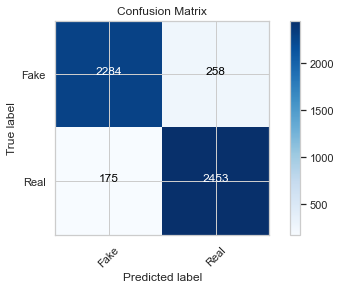

In [216]:
cm3 = metrics.confusion_matrix(Y_test_3, X_test_prediction_3)
plot_confusion_matrix(cm3, classes=['Fake', 'Real'])

## Prediction Fake or Real news

### [Data1 : author, title, text fillna with " "]

In [131]:
X_test_sample = X_test[25]

In [132]:
predict = Model.predict(X_test_sample)
print(predict)

[0]


In [133]:
print(Y_test[25])

0


### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with None-Title)  
### text --> (fillna with " ")]

In [134]:
X_test_sample_2 = X_test_2[25]

In [135]:
predict2 = Model.predict(X_test_sample_2)
print(predict2)

[0]


In [136]:
print(Y_test_2[25])

0
